# **Trabalho \#2**:  Aprendizado de Máquina e Reconhecimento de Padrões MC886/MO444
Instituto de Computação (IC/UNICAMP), 2ᵒ Semestre, 2024

Profa. Sandra Avila, 2024s2

Trabalho proposto por Caio Petrucci Rosa (PAD), Cesar Guedes Carneiro (PED) e Sandra Avila.



## Objetivo

Explore os modelos de **regressão linear** e **regressão logística** e apresente o melhor modelo que você encontrar para o problema, evitando o *overfitting*. Em particular, realize predições acerca do salário dos profissionais da área de dados no Brasil, com base nos dados da pesquisa State of Data Brazil 2023, levando em consideração variáveis como perfil demográfico, formação, experiência e atuação no setor.


---

## Base de Dados

A base de dados deste trabalho foi criado a partir de dados disponibilizados em [State of Data Brazil 2023](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023). Os dados refletem a pesquisa realizada com profissionais da área de Ciência de Dados no Brasil. As respostas foram coletadas em 2023 e a base de dados contém uma ampla variedade de perguntas sobre o perfil demográfico, situação profissional e conhecimentos técnicos dessas pessoas.

**Dicionário de dados:**

* **id**: Identificador único da pessoa participante;

* **idade**: Idade da pessoa participante;

* **genero**: Gênero da pessoa participante;

* **cor_raca**: Cor/raça/etnia da pessoa participante;

* **pcd**: Se a pessoa participante possui alguma deficiência (PCD);

* **estado_residencia**: Estado onde a pessoa participante mora;

* **mudou_estado**: Se a pessoa participante mudou de estado recentemente;

* **regiao_origem**: Região de origem da pessoa participante;

* **nivel_ensino**: Nível de ensino da pessoa participante;

* **area_formacao**: Área de formação acadêmica;

* **situacao_trabalho**: Situação atual de trabalho;

* **setor**: Setor em que a pessoa participante trabalha;

* **numero_funcionarios**: Número de funcionários na empresa onde a pessoa participante trabalha;

* **gestor**: Se a pessoa participante é gestor na empresa;

* **cargo**: Cargo da pessoa participante;

* **nivel_profissional**: Nível profissional da pessoa participante;

* **tempo_exp_dados**: Tempo de experiência na área de dados;

* **tempo_exp_ti**: Tempo de experiência prévia na área de TI ou Engenharia de Software antes de atuar com dados;

* **satisfacao_empresa**: Nível de satisfação da pessoa participante com sua empresa atual;

* **forma_trabalho_atual**: Forma de trabalho atual (presencial, remoto, híbrido);

* **atuacao_dia_a_dia**: Reflexão da atuação da pessoa participante no dia a dia em relação ao cargo formal;

* **fontes_dados_analise**: Fontes de dados já analisadas ou processadas pela pessoa participante no trabalho;

* **fontes_dados_uso**: Fontes de dados mais utilizadas pela pessoa participante no trabalho;

* **linguagens_trabalho**: Linguagens de programação utilizadas no trabalho;

* **linguagem_mais_usada**: Linguagem de programação mais utilizada no trabalho;

* **linguagem_preferida**: Linguagem de programação preferida da pessoa participante;

* **bancos_dados_trabalho**: Bancos de dados utilizados no trabalho;

* **cloud_preferida**: Cloud preferida da pessoa participante;

* **cloud_usada**: Cloud usada no trabalho;

* **ferramenta_bi_dia_a_dia**: Ferramenta de BI utilizada no dia a dia;

* **ferramenta_bi_preferida**: Ferramenta de BI preferida;

* **tipo_uso_ai**: Tipo de uso de AI Generativa e LLMs na empresa;

* **uso_chatgpt**: Se a pessoa participante utiliza ChatGPT ou LLMs no trabalho;

* **faixa_salarial**: Faixa salarial da pessoa participante;

* **salario**: Valor do salário da pessoa participante.


Você deve **respeitar a seguinte divisão de treino/teste**:

    train_data.csv
    test_data.csv

Lembre-se de criar **seu próprio conjunto de validação**, a partir um subconjunto do conjunto de treinamento, e utilize o conjunto de teste (a ser disponibilizado) apenas para inferência e relato do resultado final.

Atividades

1. (0,4 pontos) Realize a limpeza e preparação dos dados de treinamento.

  > **Considere os seguintes fatores:**
  > - Existem outliers nos dados? Se sim, como você pretende tratá-los (removê-los, ajustá-los, ou usar uma abordagem alternativa)?
  > - Há valores ausentes? Se sim, como irá lidar com eles? (Ex.: exclusão de linhas, preenchimento por média/mediana/moda, ou outros métodos).
  > - Como você planeja tratar variáveis categóricas? (Ex.: one-hot encoding, label encoding, ou outra estratégia).

In [ ]:
# TODO: Carregue e pré-processe (limpeza e preparação) os dados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor, LinearRegression as SklearnLinearRegression
from sklearn.impute import KNNImputer
%matplotlib inline

In [ ]:
df = pd.read_csv("train_data.csv")

## 2. (0,5 pontos) Faça uma análise exploratória de dados.

  > Procure entender como os dados se comportam e as relações entre diferentes *features*.
  >
  > **Alguns fatores a serem considerados:** Quais as distribuição dos valores de cada atributos? Como é a correlação entre os diferentes atributos? Existe multicolinearidade entre algumas *features*?

In [ ]:
# TODO: Análise exploratória dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3802 non-null   object 
 1   idade                    3802 non-null   int64  
 2   genero                   3802 non-null   object 
 3   cor_raca                 3802 non-null   object 
 4   pcd                      3802 non-null   object 
 5   estado_residencia        3719 non-null   object 
 6   mudou_estado             3719 non-null   float64
 7   regiao_origem            765 non-null    object 
 8   nivel_ensino             3802 non-null   object 
 9   area_formacao            3722 non-null   object 
 10  situacao_trabalho        3802 non-null   object 
 11  setor                    3802 non-null   object 
 12  numero_funcionarios      3802 non-null   object 
 13  gestor                   3802 non-null   float64
 14  nivel_profissional      

In [ ]:
df.describe()

,idade,mudou_estado,gestor,satisfacao_empresa,salario
count,3802.000000,3719.000000,3802.000000,3802.000000,3802.000000
mean,31.842451,0.794300,0.189111,0.720410,10813.185166
std,7.272583,0.404267,0.391648,0.448857,10216.885675
min,18.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,1.000000,0.000000,0.000000,4833.000000
50%,30.000000,1.000000,0.000000,1.000000,8351.500000
75%,36.000000,1.000000,0.000000,1.000000,13695.500000
max,70.000000,1.000000,1.000000,1.000000,98017.000000


In [ ]:
df.shape

(3802, 35)

In [ ]:
df.head(2)

,id,idade,genero,cor_raca,pcd,estado_residencia,mudou_estado,regiao_origem,nivel_ensino,area_formacao,...,bancos_dados_trabalho,cloud_preferida,cloud_usada,ferramenta_bi_dia_a_dia,ferramenta_bi_preferida,tipo_uso_ai,uso_chatgpt,cargo,faixa_salarial,salario
0,rpck9xz6tncfzyjdm0xbrpck9qsla13r,29,Masculino,Branca,Não,Minas Gerais (MG),1.0,NaN,Mestrado,Computação / Engenharia de Software / Sistemas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sócio ou C-level (CEO, CDO, CIO, CTO etc)",de R$ 25.001/mês a R$ 30.000/mês,27510.0
1,zyg9519671iqrgy93qzyg95183k8ix5f,34,Masculino,Preta,Não,Minas Gerais (MG),1.0,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Team Leader/Tech Leader,de R$ 20.001/mês a R$ 25.000/mês,23837.0


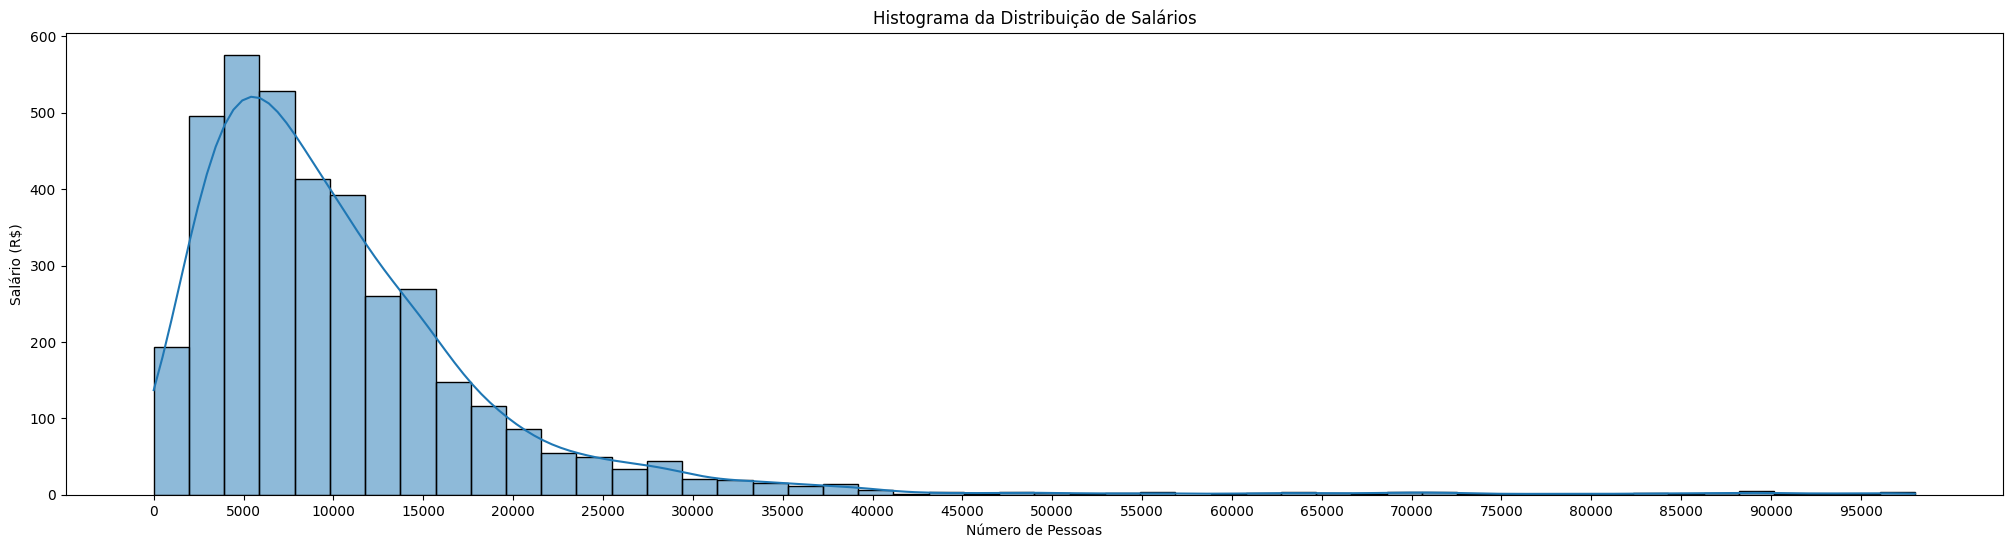

In [ ]:
plt.figure(figsize=(25, 6))
sns.histplot(df['salario'], bins=50, kde=True)

plt.xticks(np.arange(0, df['salario'].max() + 1, step=5000))

plt.title('Histograma da Distribuição de Salários')
plt.xlabel('Número de Pessoas')
plt.ylabel('Salário (R$)')
plt.show()

Pelo histograma é possível observar que a distribuição de salários é right-skewed e vemos que existem alguns poucos salários muito mais altos que a maioria (80k, 90k), e que também os cargos com maiores salários são o de diretor e gerente

In [ ]:
df['salario'].mean()

10813.185165702262

In [ ]:
df['genero'].value_counts()

,count
genero,
Masculino,2889
Feminino,898
Prefiro não informar,10
Outro,5


Proporção de homens em relação a mulheres e outros, excluindo os que não informaram:

In [ ]:
quantidade_homem = df['genero'].value_counts()['Masculino']
outros_generos = df['genero'].value_counts().drop(['Masculino', 'Prefiro não informar']).sum()
porporcao_homem = quantidade_homem / (quantidade_homem + outros_generos) * 100

print(f'Porporção de Homens: {porporcao_homem:.2f}%')

Porporção de Homens: 76.19%


In [ ]:
df['cor_raca'].value_counts()

,count
cor_raca,
Branca,2453
Parda,912
Preta,276
Amarela,110
Prefiro não informar,27
Outra,13
Indígena,11


Proporção de Brancos em relação a outras raças, excluindo os que não informaram:

In [ ]:
quantidade_branca = df['cor_raca'].value_counts()['Branca']
outras_racas = df['cor_raca'].value_counts().drop(['Branca', 'Prefiro não informar']).sum()
porporcao_branca = quantidade_branca / (quantidade_branca + outras_racas) * 100

print(f'Porporção de Brancos: {porporcao_branca:.2f}%')

Porporção de Brancos: 64.98%


In [ ]:
limiar_salario = 25000
filtro_salario_alto =  df[df['salario'] > limiar_salario]
contagem_salario_alto = filtro_salario_alto.shape[0]
print(f'Maior que {limiar_salario}: {contagem_salario_alto}')

Maior que 25000: 231


A proporção de salários altos por gênero e cargo

In [ ]:
ocorrencias_genero = filtro_salario_alto['genero']
ocorrencias_genero.value_counts()

,count
genero,
Masculino,201
Feminino,28
Prefiro não informar,2


proporção de homens em relação a outros generos com salários altos

In [ ]:
salario_alto_genero = filtro_salario_alto['genero'].value_counts(normalize=True) * 100
print(f"Percentagens dos gêneros com salário acima de 40k: \n{salario_alto_genero}")

Percentagens dos gêneros com salário acima de 40k: 
genero
Masculino               87.012987
Feminino                12.121212
Prefiro não informar     0.865801
Name: proportion, dtype: float64


proporção de brancos em relação a outras raças com salários altos

In [ ]:
salario_alto_raca = filtro_salario_alto['cor_raca'].value_counts(normalize=True) * 100
print(f"Percentagens das raças com salário acima de 40k: \n{salario_alto_raca}")

Percentagens das raças com salário acima de 40k: 
cor_raca
Branca                  70.995671
Parda                   17.748918
Preta                    4.761905
Amarela                  4.329004
Prefiro não informar     1.298701
Outra                    0.865801
Name: proportion, dtype: float64


In [ ]:
ocorrencias_cargo = filtro_salario_alto['cargo']
ocorrencias_cargo.value_counts()

,count
cargo,
Gerente/Head,87
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,36
Cientista de Dados/Data Scientist,21
Diretor/VP,19
"Sócio ou C-level (CEO, CDO, CIO, CTO etc)",16
Team Leader/Tech Leader,12
Supervisor/Coordenador,7
Analista de Dados/Data Analyst,7
Outra Opção,6


In [ ]:
cargo_salario = df.groupby('cargo')['salario'].mean().sort_values(ascending=False)
cargo_salario

,salario
cargo,
Diretor/VP,34620.827586
Gerente/Head,23176.409266
"Sócio ou C-level (CEO, CDO, CIO, CTO etc)",19950.575758
Team Leader/Tech Leader,15675.355769
Professor/Pesquisador,13985.625000
Supervisor/Coordenador,13232.386973
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,12062.998201
Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO),11564.138462
Engenheiro de Machine Learning/ML Engineer/AI Engineer,11551.724138


In [ ]:
df['salario'].max()

98017.0

Média do salário por gênero

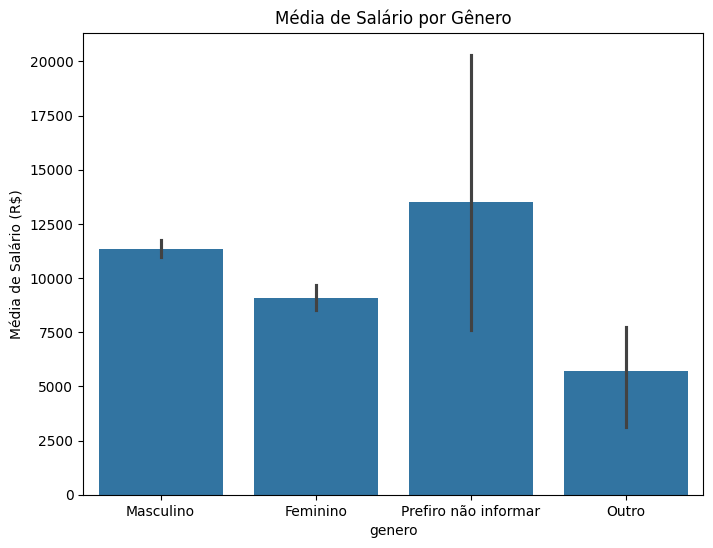

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='genero', y='salario', data=df, estimator=np.mean)
plt.title('Média de Salário por Gênero')
plt.ylabel('Média de Salário (R$)')
plt.show()

In [ ]:
df['nivel_profissional'].value_counts()

,count
nivel_profissional,
Sênior,1140
Pleno,1118
Júnior,825


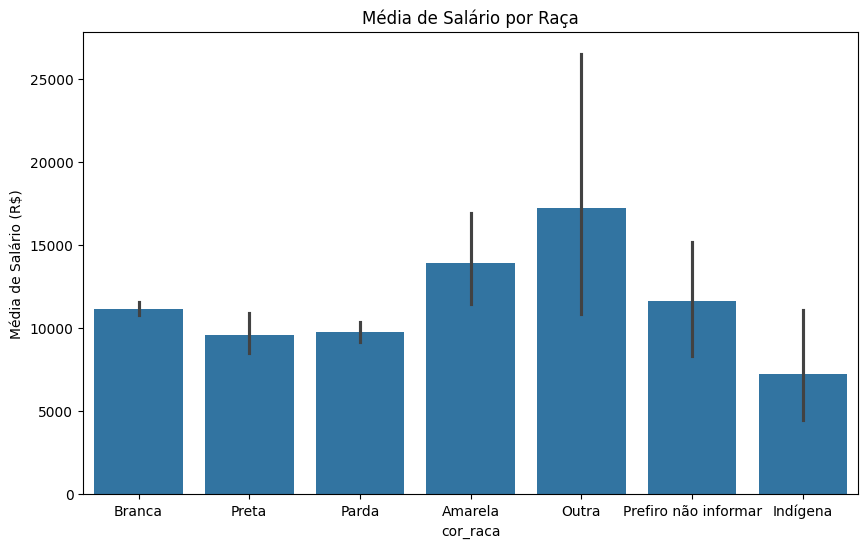

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cor_raca', y='salario', data=df, estimator=np.mean)
plt.title('Média de Salário por Raça')
plt.ylabel('Média de Salário (R$)')
plt.show()

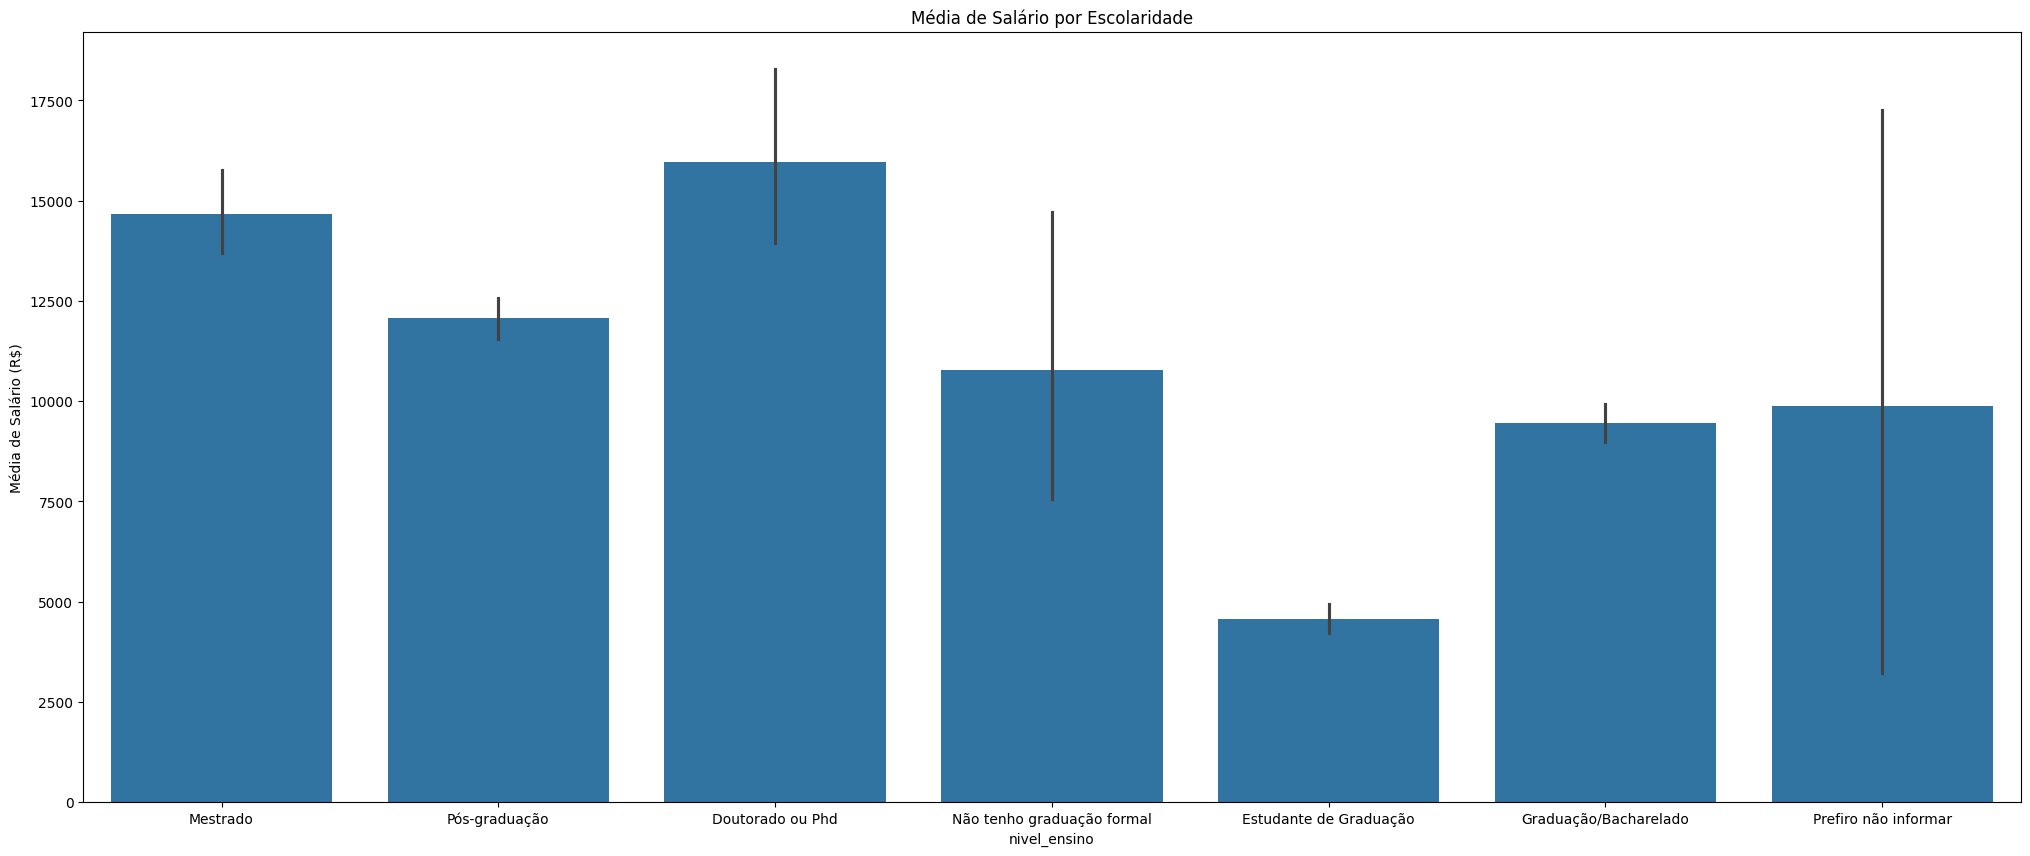

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(x='nivel_ensino', y='salario', data=df, estimator=np.mean)
plt.title('Média de Salário por Escolaridade')
plt.ylabel('Média de Salário (R$)')
plt.show()

In [ ]:
df['area_formacao'].value_counts()

,count
area_formacao,
Computação / Engenharia de Software / Sistemas de Informação/ TI,1555
Outras Engenharias,792
Economia/ Administração / Contabilidade / Finanças/ Negócios,586
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,267
Outra opção,196
Marketing / Publicidade / Comunicação / Jornalismo,101
Química / Física,92
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde,75
Ciências Sociais,58


In [ ]:
percentagens_formacao = df['area_formacao'].value_counts(normalize=True) * 100
print(percentagens_formacao)

area_formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          41.778614
Outras Engenharias                                                        21.278882
Economia/ Administração / Contabilidade / Finanças/ Negócios              15.744224
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     7.173563
Outra opção                                                                5.265986
Marketing / Publicidade / Comunicação / Jornalismo                         2.713595
Química / Física                                                           2.471789
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     2.015046
Ciências Sociais                                                           1.558302
Name: proportion, dtype: float64


In [ ]:
percentagens_escolaridade = filtro_salario_alto['area_formacao'].value_counts(normalize=True) * 100
print(percentagens_escolaridade)

area_formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          52.212389
Economia/ Administração / Contabilidade / Finanças/ Negócios              16.371681
Outras Engenharias                                                        15.929204
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     7.522124
Química / Física                                                           2.212389
Outra opção                                                                1.769912
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     1.769912
Ciências Sociais                                                           1.327434
Marketing / Publicidade / Comunicação / Jornalismo                         0.884956
Name: proportion, dtype: float64


Esperava-se que o dataframe de salários mais altos e consequentementes cargos mais administrativos tivessse um aumento no número de formados en administração, economia e etc.

In [ ]:
df['cloud_preferida'].value_counts()

,count
cloud_preferida,
Amazon Web Services (AWS),685
Azure (Microsoft),491
Google Cloud (GCP),472
Servidores On Premise/Não utilizamos Cloud,295
Cloud Própria,105
...,...
"Azure (Microsoft), Cloud Própria, Google Cloud (GCP)",1
"Amazon Web Services (AWS), Azure (Microsoft), Servidores On Premise/Não utilizamos Cloud, Cloud Própria, Google Cloud (GCP)",1
"Amazon Web Services (AWS), OVH",1


In [ ]:
df['cloud_usada'].value_counts()

,count
cloud_usada,
Amazon Web Services (AWS),1322
Google Cloud (GCP),849
Azure (Microsoft),802
Não tenho preferência,4
Não sei,4
Oracle,3
Databricks,3
Sem preferência,2
Nao consigo escolher,1


A coluna *id* parece não ser relevante para nós pois é provavelmente um índice atribuído sem qualquer correlação importante com o resto dos dados. As colunas de uso e preferência como *cloud_usada* e *cloud_preferida* parecem ser redundantes, as colunas que representam um uso no trabalho como *cloud_usada* estão mais bem preenchidas (com menos valores faltantes). Por isso vamos optar por excluir as colunas de preferência, buscando também evitar um pouco a quantidade de ruído no modelo. A coluna região_origem tem uma grande quantidade de valores faltando e vamos excluí-la

In [ ]:
df['regiao_origem'].value_counts()

,count
regiao_origem,
São Paulo (SP),116
Minas Gerais (MG),96
Rio de Janeiro (RJ),92
Bahia (BA),59
Paraná (PR),52
Rio Grande do Sul (RS),41
Pará (PA),34
Pernambuco (PE),31
Santa Catarina (SC),29


Além disso, não tem representação suficiente de certos estados

É possível ver também que a coluna *faixa_salarial* representa um data leakage, já que revela muito do nosso target e realisticamente não faz sentido para nossa tarefa de prever o salário e entender quais features tem mais impacto nisso.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

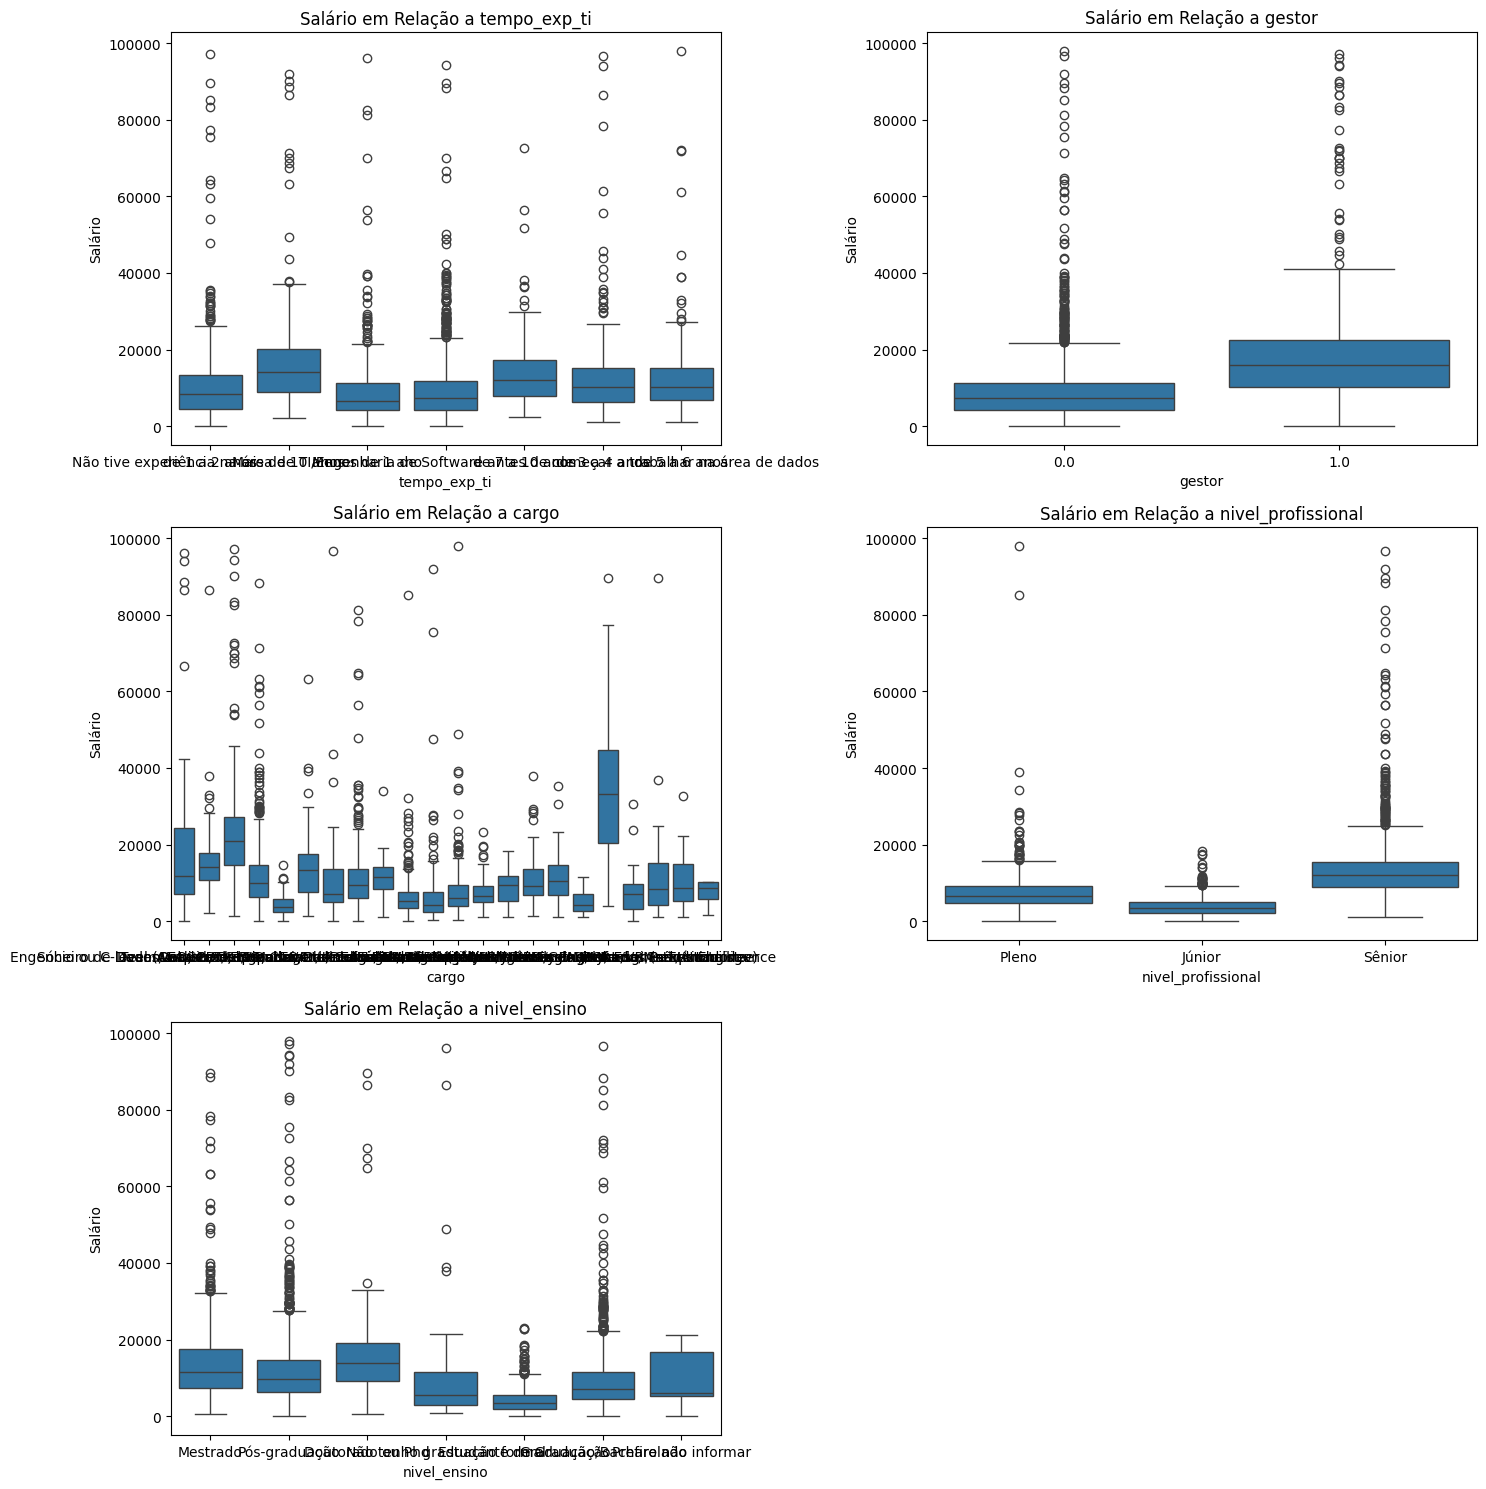

In [ ]:
colunas_de_interesse = ['tempo_exp_ti', 'gestor', 'cargo', 'nivel_profissional', 'nivel_ensino']

# Definir layout para os gráficos
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Loop para criar cada gráfico na posição correta
for ax, col in zip(axes.flat, colunas_de_interesse):
    sns.boxplot(x=col, y='salario', data=df, ax=ax)
    ax.set_title(f'Salário em Relação a {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Salário')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

## Limpeza e transformação dos dados

In [ ]:
# TODO: Divisão de treinamento e validação
def split_e_normaliza(df: pd.DataFrame, y_col='salario', train_frac=0.8):
  np.random.seed(42)
  X = df.drop(y_col, axis=1)
  y = df[y_col]
  dados_copy = X.copy()
  dados_copy[y_col] = y
  # Embaralhamento
  dados_copy = dados_copy.sample(frac=1, random_state=42).reset_index(drop=True)
  # train_frac% de treino
  train_size = int(train_frac * len(dados_copy))
  # Dividindo em treino e validação
  train_data = dados_copy.iloc[:train_size]
  val_data = dados_copy.iloc[train_size:]

  if (y_col == 'faixa_salarial'):
    n_classes = len(dados_copy[y_col].unique())
    while (len(val_data[y_col].unique()) != len(train_data[y_col].unique())):
      dados_copy = dados_copy.sample(frac=1).reset_index(drop=True)
      train_size = int(train_frac * len(dados_copy))
      train_data = dados_copy.iloc[:train_size]
      val_data = dados_copy.iloc[train_size:]

  X_train = train_data.drop(y_col, axis=1)
  y_train = train_data[y_col]

  X_val = val_data.drop(y_col, axis=1)
  y_val = val_data[y_col]

  # normalizando
  colunas_normalizar = X_train.select_dtypes(exclude=['bool']).columns
  # mean = X_train[colunas_normalizar].mean(axis=0)
  # std = X_train[colunas_normalizar].std(axis=0)
  # # Normalizando as colunas selecionadas nos conjuntos de treino e validação
  # X_train[colunas_normalizar] = (X_train[colunas_normalizar] - mean) / std
  # X_val[colunas_normalizar] = (X_val[colunas_normalizar] - mean) / std
  min_train = X_train[colunas_normalizar].min(axis=0)
  max_train = X_train[colunas_normalizar].max(axis=0)
  # Aplicar a normalização Min-Max usando apenas os valores do treino
  X_train[colunas_normalizar] = (X_train[colunas_normalizar] - min_train) / (max_train - min_train)
  X_val[colunas_normalizar] = (X_val[colunas_normalizar] - min_train) / (max_train - min_train)
  return X_train, y_train, X_val, y_val, min_train, max_train

## Regressão Linear

Esta parte do trabalho visa prever o valor do salário dos profissionais, descrita pelo atributo `salario`, com base em seus dados demográficos e informações de carreira.

O atributo alvo nesta etapa é o atributo `salario`. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão linear, com base em sua análise exploratória.

In [ ]:
#TODO: Seleção de features.
# Abaixo a classe PreparaDados que aplica tudo que fizemos acima no notebook
class PreparaDadosSimplificada():
    def __init__(self, df, teste=False):
        """
        Realiza todas as transformações necessárias nos dados para realização da regressão linear
        Parâmetros:
        -df: dataframe a ser preparado
        -teste: flag para indicar se é para preparar o testee ou não
        """
        self.colunas_final = ['tempo_exp_ti', 'gestor', 'cargo', 'nivel_profissional', 'nivel_ensino', 'salario']
        self.teste = teste
        if self.teste:
          self.colunas_final = self.colunas_final[:-1]
        self.df_processado = df[self.colunas_final]
        # Mapas para o label encoding
        self.tempo_exp_ti_map = {
            'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados': 0,
            'Menos de 1 ano': 1,
            'de 1 a 2 anos': 2,
            'de 3 a 4 anos': 3,
            'de 5 a 6 anos': 4,
            'de 7 a 10 anos': 5,
            'Mais de 10 anos': 6
        }

        self.nivel_ensino_map = {
            'Prefiro não informar': 0,
            'Não tenho graduação formal': 0,
            'Estudante de Graduação': 1,
            'Graduação/Bacharelado': 2,
            'Pós-graduação': 3,
            'Mestrado': 4,
            'Doutorado ou Phd': 5
        }

        self.nivel_profissional_map = {'Júnior': 0, 'Pleno': 1, 'Sênior': 2}
        # Mapeamento de cargos
        self.grupo_cargos = {
            'Diretor/VP': 'Executivo',
            'Sócio ou C-level (CEO, CDO, CIO, CTO etc)': 'Executivo',
            'Gerente/Head': 'Gestor',
            'Supervisor/Coordenador': 'Gestor',
            'Team Leader/Tech Leader': 'Líder Técnico',
            'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect': 'Engenheiro/Especialista',
            'Engenheiro de Machine Learning/ML Engineer/AI Engineer': 'Engenheiro/Especialista',
            'Analytics Engineer': 'Engenheiro/Especialista',
            'Estatístico': 'Engenheiro/Especialista',
            'DBA/Administrador de Banco de Dados': 'Engenheiro/Especialista',
            'Professor/Pesquisador': 'Acadêmico',
            'Cientista de Dados/Data Scientist': 'Profissional de Dados',
            'Analista de Negócios/Business Analyst': 'Profissional de Dados',
            'Analista de Dados/Data Analyst': 'Profissional de Dados',
            'Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)': 'Gerente de Produto',
            'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas': 'Desenvolvedor/Engenheiro de Software',
            'Analista de BI/BI Analyst': 'Profissional de Dados',
            'Analista de Inteligência de Mercado/Market Intelligence': 'Profissional de Dados',
            'Analista de Suporte/Analista Técnico': 'Suporte Técnico',
            'Economista': 'Outros',
            'Outras Engenharias (não inclui dev)': 'Outros',
            'Outra Opção': 'Outros'
        }

    def _remove_outliers(self):
        Q1 = self.df_processado['salario'].quantile(0.25)
        Q3 = self.df_processado['salario'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        self.df_processado = self.df_processado[(self.df_processado['salario'] >= lower_bound) & (self.df_processado['salario'] <= upper_bound)]


    def _aplica_label_encoding(self):
        # Aplicação dos mapeamentos
        self.df_processado['tempo_exp_ti'] = self.df_processado['tempo_exp_ti'].map(self.tempo_exp_ti_map)
        self.df_processado['nivel_ensino'] = self.df_processado['nivel_ensino'].map(self.nivel_ensino_map)
        self.df_processado['nivel_profissional'] = self.df_processado['nivel_profissional'].map(self.nivel_profissional_map)
        self.df_processado['cargo'] = self.df_processado['cargo'].map(self.grupo_cargos)
    def _imputa_knn(self):
        # Imputação com KNN para 'nivel_profissional'
        imputer = KNNImputer(n_neighbors=3)
        self.df_processado[['nivel_profissional']] = imputer.fit_transform(self.df_processado[['nivel_profissional']]).round().astype(int)
    def _one_hot_encode(self):
      self.df_processado = pd.get_dummies(self.df_processado, columns=['cargo'], drop_first=True)
      if 'cargo_Gestor' in self.df_processado.columns:
        self.df_processado.drop(columns=['cargo_Gestor'], inplace=True)

    def prepara_dados(self):
      if not self.teste:
        self._remove_outliers()
      self._aplica_label_encoding()
      self._imputa_knn()
      self._one_hot_encode()
      return self.df_processado

2. (1,75 pontos) Implemente e execute a regressão linear.

  Faça uma classe `LinearRegression` capaz de encontrar uma regressão utilizando dois métodos: **descida do gradiente** e a **equação normal**.

  Para a otimização por **descida do gradiente**, guarde o histórico da função de custo por época e retorno este histórico após a execução do ajuste. Além disso, utilize uma learning rate de `0.01` nesta etapa.

  > **Observações:** Inicie randomicamente sua regressão linear e lembre-se de não utilizar dados de teste no treinamento.

  Lembre-se que:

  > A hipótese da regressão linear é: $ h_\theta(x) = \theta^Tx$.
  >
  > E, o objetivo da regressão linear é minimizar a função de custo Root Mean Squared Error (RMSE):
  >
  > $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$
  >
  > Para minimizar o custo $J(\theta)$, o algoritmo de descida do gradiente realiza uma atualização nos parâmetros do modelo a cada iteração:
  >
  > $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
  >
  > onde $j$ é o índice do parâmetro a ser atualizado (atualizando simultaneamente $\theta_j$ para todos os $j$) e $\alpha$ é a taxa de aprendizado.

In [ ]:
# TODO: Regressão Linear. Implemente sua solução. Você não pode usar bibliotecas como scikit-learn, Keras/TensorFlow, ou PyTorch.
class LinearRegression:
    def __init__(self, method='gradient_descent', learning_rate=0.01, iter_max=10000, epsilon=1e-6):
        """
        Classe para executar regressão linear multivariada.

        Parâmetros:
        - method: tipo de método para regressão(normal ou gradiente descendente).
        - learning_rate: taxa de aprendizado para o método de descida de gradiente.
        - iter_max: número máximo de iterações para descida de gradiente.
        - epsilon: limiar de convergência
        """
        self.method = method
        self.learning_rate = learning_rate
        self.iter_max = iter_max
        self.epsilon = epsilon
        self.betas = None
        self.loss_history = []

    def fit(self, X, y):
        # X é a matriz que representa os dados (m observações x n features)
        # Adiciona um termo de bias (coluna de 1's) a matriz de entrada
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.method == 'gradient_descent':
            self.betas = self._gradient_descent(X_b, y)
        elif self.method == 'normal':
            self.betas = self._normal(X_b, y)
        else:
            raise ValueError("Escolha 'gradient_descent' ou 'normal'")

    def _gradient_descent(self, X, y):
        m = len(y)
        # Iniciando radomicamente
        betas = np.random.randn(X.shape[1])
        self.loss_history = []

        for i in range(self.iter_max):
            #print(f"iteration: {i}/{self.iter_max}")
            # Previsões com os betas atuais
            y_pred = X @ betas
            # Cálculo do erro
            erro = y_pred - y
            # Cálculo da função de custo (MSE)
            loss = np.mean(erro ** 2)
            self.loss_history.append(loss)
            # Gradiente: cálculo vetorizado
            gradiente = (2/m) * (X.T @ erro)
            # Atualizando os parâmetros (betas)
            betas_new = betas - self.learning_rate * gradiente

            # Critérios de convergência
            if i > 0 and abs(self.loss_history[-2] - loss) < self.epsilon:
                print(f"Convergiu com base na loss {i}")
                break
            if np.all(np.abs(betas_new - betas) < self.epsilon):
                print(f"Convergiu com base nos betas {i}")
                break

            betas = betas_new

        return betas

    def _normal(self, X, y):
        # Evita problemas de UFuncTypeError
        X = X.astype(np.float64)
        y = y.astype(np.float64)
        # Equação normal
        return np.linalg.inv(X.T @ X) @ (X.T @ y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona termo de bias
        return X_b @ self.betas

    def plot_loss_history(self):
      plt.plot(range(len(self.loss_history)), self.loss_history, marker='o', linestyle='-')
      plt.title('Convergência por Épocas')
      plt.xlabel('Épocas')
      plt.ylabel('Função de Custo (MSE)')
      plt.grid(True)
      plt.show()

In [ ]:
def treinamento_regressao_linear(X_train, y_train, X_val, y_val, model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)

  # Métricas
  print(f"\nMODELO: {model.method}\n")
  print(f"RMSE: {rmse}")
  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"R-squared (R2): {r2}")
  if model.method == 'gradient_descent':
      model.plot_loss_history()
  return y_pred

In [ ]:
# Preparando os dados
df_treino = pd.read_csv('train_data.csv')
prep = PreparaDadosSimplificada(df_treino, teste=False)
df_treino_preparado = prep.prepara_dados()
df_treino_preparado = df_treino_preparado[(df_treino_preparado['salario'] >= 500) & (df_treino_preparado['salario'] <= 20000)]
X_train, y_train, X_val, y_val, min, max = split_e_normaliza(df_treino_preparado)


MODELO: gradient_descent

RMSE: 3366.4598047533464
Mean Absolute Error (MAE): 2652.2937795038024
R-squared (R2): 0.47481286170734993


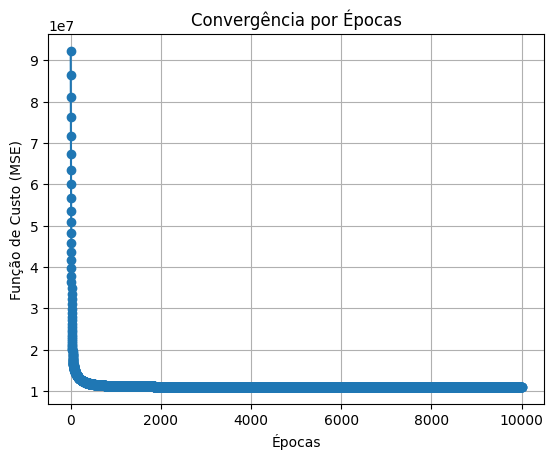


MODELO: normal

RMSE: 3363.965540749754
Mean Absolute Error (MAE): 2647.822414505142
R-squared (R2): 0.4755908125320605


In [ ]:
model_gd = LinearRegression(method='gradient_descent', learning_rate=0.01, iter_max=10000, epsilon=1e-6)
model_normal = LinearRegression(method='normal')
y_pred_gd = treinamento_regressao_linear(X_train, y_train, X_val, y_val, model_gd)
y_pred_normal = treinamento_regressao_linear(X_train, y_train, X_val, y_val, model_normal)

In [ ]:
negative_count = (y_pred_normal < 0).sum()
negative_percentage = (negative_count / y_pred_normal.size) * 100
negative_percentage

0.0

Testando o gradiente descendente com mais iterações


MODELO: gradient_descent

RMSE: 3374.694684771439
Mean Absolute Error (MAE): 2669.070567330855
R-squared (R2): 0.4722403416412143


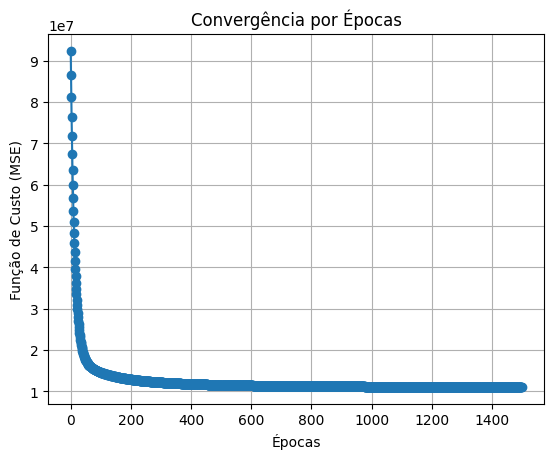

array([10923.892323266247, 10534.684064813704, 11703.686293933391,
       9989.80178434821, 4007.2229590270017, 2821.6032808079995,
       9599.318362546544, 12593.016983566527, 4130.441279670965,
       8041.750031156813, 7432.09088101023, 11004.507445217008,
       10590.26030821555, 11938.597984135045, 9989.80178434821,
       11547.370115737942, 5424.074033430882, 5955.274712218401,
       11004.507445217008, 7527.166801468606, 12411.831808109531,
       6749.52948139316, 3476.022280239482, 7387.331031725329,
       13379.647784575363, 10644.220783779694, 9989.80178434821,
       4824.45970120836, 8836.004800331571, 10644.220783779694,
       3755.6938197260347, 11004.507445217008, 10705.598082163908,
       3755.6938197260347, 2698.384960164036, 4519.007381941008,
       4689.784358644071, 9364.40667234489, 3476.022280239482,
       10828.81640280787, 3241.1105900378293, 11483.235402239354,
       6078.493032862365, 10489.924215528803, 13040.803733629085,
       10409.30909357804,

In [ ]:
# 15 mil iterações
model_gd_15k = LinearRegression(method='gradient_descent', learning_rate=0.01, iter_max=1500, epsilon=1e-6)
treinamento_regressao_linear(X_train, y_train, X_val, y_val, model_gd_15k)

> **Quais foram suas conclusões? (1-2 parágrafos)**




Nossa implementação de regressão linear foi um processo desafiador, mas extremamente recompensador. Desenvolver tanto o método da Equação Normal quanto a Descida de Gradiente, nos permitiu compreender melhor como essas abordagens ajustam os coeficientes do modelo. Embora tenha sido complexo garantir a convergência no gradiente descendente, especialmente com a escolha adequada da taxa de aprendizado e critérios de parada, o aprendizado adquirido sobre como o algoritmo minimiza a função de custo nos deu uma visão mais dinâmica dele. Além disso, observar os gráficos de convergência nos ajudou a visualizar o progresso do modelo em direção ao ajuste ótimo.

3. (0,75 pontos) Experimente diferentes valores de *learning rates* para a descida de gradiente (GD). Plote o histórico da função de custo (função de custo vs. número de épocas) no conjunto de treinamento e no de validação para cada experimento.



LR: 0.1

MODELO: gradient_descent

RMSE: 3366.459922722941
Mean Absolute Error (MAE): 2652.2915487610617
R-squared (R2): 0.4748128248994756


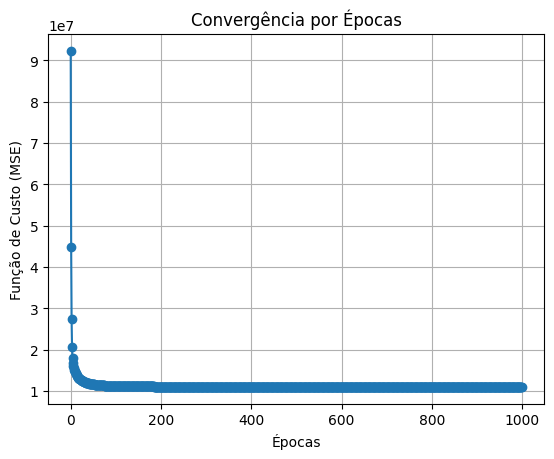

LR: 0.001

MODELO: gradient_descent

RMSE: 3819.851090615989
Mean Absolute Error (MAE): 3123.4467458061754
R-squared (R2): 0.32382348735461264


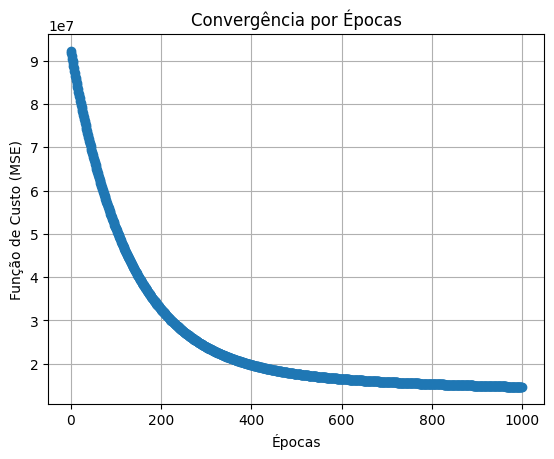

LR: 0.0001

MODELO: gradient_descent

RMSE: 7136.084014425698
Mean Absolute Error (MAE): 5687.335226581636
R-squared (R2): -1.3598648081844895


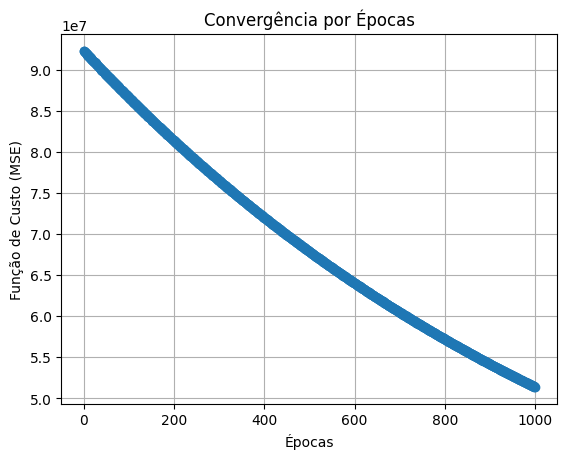

In [ ]:
# TODO: Descida do gradiente (GD) com 3 diferentes learning rates.
lista_lr = [0.1, 0.001, 0.0001]
for lr in lista_lr:
  model_gd = LinearRegression(method='gradient_descent', learning_rate=lr, iter_max=1000, epsilon=1e-6)
  print(f"LR: {lr}")
  treinamento_regressao_linear(X_train, y_train, X_val, y_val, model_gd)

> **Quais foram suas conclusões? (1-2 parágrafos)**




Um menor learning rate permitiu uma descida do gradiente mais suave, como é perceptível pelos gráficos da função de custo ao longo das épocas. Isso acontece porque um learning rate reduzido diminui o tamanho dos passos que o algoritmo de otimização dá na direção do gradiente negativo. Com passos menores, o algoritmo evita grandes oscilações e possíveis saltos sobre mínimos locais, resultando em um processo de treinamento mais estável e controlado. Nos gráficos, isso se reflete em uma curva de função de custo que decresce de forma mais uniforme e gradual, indicando uma adaptação cuidadosa dos pesos do modelo. Os resultados aparentemente pioraram com a diminuição do learning rate

 4. (0,25 pontos) Compare o seu melhor experimento baseado em GD com a sua implementação da equação normal.

In [ ]:
# TODO: Compare as implementações
"""Fiz ali em cima"""

'Fiz ali em cima'

> **Quais foram suas conclusões? (1-2 parágrafos)**




> A comparação entre o modelo de Regressão Linear utilizando Equação Normal e a implementação baseada em Gradient Descent mostra resultados muito semelhantes. O RMSE e MAE diferem apenas marginalmente (diferença de aproximadamente 2 a 5 unidades), e o R² é quase idêntico, indicando que ambos os métodos estão se ajustando de maneira muito parecida aos dados. O modelo de descida do gradiente é bem mais sensível a quantidade de features do modelo, e leva muito mais tempo em comparação ao método da equação normal com o aumento de features.


5. (1,25 pontos) Implementa e execute duas regressões lineares utilizando sklearn:

  1. Execute uma regressão com `sklearn.linear_model.SGDRegressor`, que utiliza descida do gradiente minimizando uma função de custo regularizada.
  2. Execute uma regressão com `sklearn.linear_model.LinearRegression`, que utiliza o método da equação normal.

  Compare os resultados obtidos com as suas implementações (de GD e da equação normal).

  Ou seja, compare o `sklearn.linear_model.SGDRegressor` com a sua implementação da descida do gradiente e o `sklearn.linear_model.LinearRegression` com a sua implementação da equação normal.

  > **Observação:** Utilize uma learning rate igual a algum dos experimentos que já fez para realizar uma comparação justa.


In [ ]:
# TODO: Regressão Linear. Faça a regressão novamente, agora utilizando o sklearn.linear_model.SGDRegressor e sklearn.linear_model.LinearRegression.

# Passo 1: Implementação usando SGDRegresso
sgd_model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6, random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_val)

# Passo 2: Implementação usando LinearRegression do sklearn (Equação Normal)
sklearn_normal_model = SklearnLinearRegression()
sklearn_normal_model.fit(X_train, y_train)
y_pred_normal = sklearn_normal_model.predict(X_val)

# Passo 3: Comparando resultados
y_pred_gd = model_gd.predict(X_val)  # Implementação personalizada de GD
y_pred_eq_normal = model_normal.predict(X_val)  # Implementação personalizada de Equação Normal

# Passo 4: Calcular as métricas para todas as abordagens
def print_metrics(y_true, y_pred, label):
    print(f"Resultados para {label}:")
    print(f"R²: {r2_score(y_true, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"MAE: {np.mean(np.abs(y_true - y_pred))}")
    print("-" * 50)

# Comparação entre as métricas
print_metrics(y_val, y_pred_sgd, "SGDRegressor (sklearn) - Gradient Descent")
print_metrics(y_val, y_pred_gd, "Implementação Customizada - Gradient Descent")

print_metrics(y_val, y_pred_normal, "LinearRegression (sklearn) - Equação Normal")
print_metrics(y_val, y_pred_eq_normal, "Implementação Customizada - Equação Normal")


Resultados para SGDRegressor (sklearn) - Gradient Descent:
R²: 0.4676437903598395
RMSE: 3389.3588672872443
MAE: 2687.562386319159
--------------------------------------------------
Resultados para Implementação Customizada - Gradient Descent:
R²: -1.3598648081844895
RMSE: 7136.084014425698
MAE: 5687.3352265816275
--------------------------------------------------
Resultados para LinearRegression (sklearn) - Equação Normal:
R²: 0.47559081253206115
RMSE: 3363.9655407497517
MAE: 2647.8224145051254
--------------------------------------------------
Resultados para Implementação Customizada - Equação Normal:
R²: 0.4755908125320605
RMSE: 3363.965540749754
MAE: 2647.82241450514
--------------------------------------------------


> **Quais foram suas conclusões? (1-2 parágrafos)**




*Nossa implementação da Equação Normal mostrou resultados muito próximos ao LinearRegression do scikit-learn, com praticamente os mesmos valores de R², RMSE e MAE, confirmando que conseguimos replicar com sucesso a técnica analítica para regressão linear. Já na comparação das descidas de gradiente, o SGDRegressor do scikit-learn apresentou um desempenho superior em relação à nossa implementação.*

6. (0,4 ponto) Às vezes, precisamos de alguma função mais complexa para fazer uma boa predição. Elabore e avalie um modelo de Regressão Polinomial.

In [ ]:
# TODO: Regressão polinomial. Está liberado utilizar scikit-learn.
from sklearn.preprocessing import PolynomialFeatures
# Listas para armazenar os resultados
degrees = [1, 2, 3, 4, 5]
r2_scores = []
rmse_scores = []
mae_scores = []

# Loop para testar diferentes graus de polinômio
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    y_pred_poly = poly_model.predict(X_val_poly)

    rmse_poly = np.sqrt(mean_squared_error(y_val, y_pred_poly))
    mae_poly = mean_absolute_error(y_val, y_pred_poly)
    r2_poly = r2_score(y_val, y_pred_poly)

    r2_scores.append(r2_poly)
    rmse_scores.append(rmse_poly)
    mae_scores.append(mae_poly)

    print(f"Grau {degree}: R² = {r2_poly:.4f}, RMSE = {rmse_poly:.4f}, MAE = {mae_poly:.4f}")

# Passo 5: Plotar as métricas para visualizar o desempenho com diferentes graus
plt.figure(figsize=(12, 6))
plt.plot(degrees, r2_scores, marker='o', label='R²')
plt.plot(degrees, rmse_scores, marker='o', label='RMSE')
plt.plot(degrees, mae_scores, marker='o', label='MAE')
plt.xlabel('Grau Polinomial')
plt.ylabel('Valor da Métrica')
plt.title('Comparação de Métricas para Diferentes Graus Polinomiais')
plt.legend()
plt.grid(True)
plt.show()

Grau 1: R² = 0.4748, RMSE = 3366.4604, MAE = 2652.2940
Grau 2: R² = 0.4738, RMSE = 3369.5519, MAE = 2640.0191
Grau 3: R² = 0.4686, RMSE = 3386.3541, MAE = 2655.5684


KeyboardInterrupt: 

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

## Regressão Logística

Esta parte do trabalho visa prever a faixa salarial dos profissionais, descrita pelo atributo `faixa_salarial`, com base em seus dados demográficos e informações de carreira. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão logística, com base em sua análise exploratória.

In [ ]:
# Abaixo a classe PreparaDados que aplica tudo que fizemos acima no notebook
class PreparaDadosRegLog():
    def __init__(self, df, teste=False):
        """
        Realiza todas as transformações necessárias nos dados para realização da regressão linear
        Parâmetros:
        -df: dataframe a ser preparado
        -teste: flag para indicar se é para preparar o testee ou não
        """
        self.colunas_final = ['tempo_exp_ti', 'gestor', 'cargo', 'nivel_profissional', 'nivel_ensino', 'faixa_salarial']
        self.teste = teste
        if self.teste:
          self.colunas_final = self.colunas_final[:-1]
        self.df_processado = df[self.colunas_final]

        # Mapas para o label encoding
        self.tempo_exp_dados_map = {
            'Não tenho experiência na área de dados': 0,
            'Menos de 1 ano': 1,
            'de 1 a 2 anos': 2,
            'de 3 a 4 anos': 3,
            'de 4 a 6 anos': 4,
            'de 5 a 6 anos': 5,
            'de 7 a 10 anos': 6,
            'Mais de 10 anos': 7
        }

        self.tempo_exp_ti_map = {
            'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados': 0,
            'Menos de 1 ano': 1,
            'de 1 a 2 anos': 2,
            'de 3 a 4 anos': 3,
            'de 5 a 6 anos': 4,
            'de 7 a 10 anos': 5,
            'Mais de 10 anos': 6
        }

        self.nivel_ensino_map = {
            'Prefiro não informar': 0,
            'Não tenho graduação formal': 0,
            'Estudante de Graduação': 1,
            'Graduação/Bacharelado': 2,
            'Pós-graduação': 3,
            'Mestrado': 4,
            'Doutorado ou Phd': 5
        }

        self.nivel_profissional_map = {'Júnior': 0, 'Pleno': 1, 'Sênior': 2}

        self.numero_func_map = {
            'de 1 a 5': 0,
            'de 6 a 10': 1,
            'de 11 a 50': 2,
            'de 51 a 100': 3,
            'de 101 a 500': 4,
            'de 501 a 1.000': 5,
            'de 1.001 a 3.000': 6,
            'Acima de 3.000': 7,
            'de 501 a 100': 3
        }

        self.faixa_salarial_map = {
           'Acima de R$ 40.001/mês'           :13,
           'de R$ 30.001/mês a R$ 40.000/mês' :12,
            'de R$ 25.001/mês a R$ 30.000/mês':11,
            'de R$ 20.001/mês a R$ 25.000/mês':10,
            'de R$ 16.001/mês a R$ 20.000/mês':9,
            'de R$ 12.001/mês a R$ 16.000/mês':8,
            'de R$ 8.001/mês a R$ 12.000/mês' :7,
            'de R$ 6.001/mês a R$ 8.000/mês'  :6,
            'de R$ 4.001/mês a R$ 6.000/mês'  :5,
            'de R$ 3.001/mês a R$ 4.000/mês'  :4,
            'de R$ 2.001/mês a R$ 3.000/mês'  :3,
            'de R$ 1.001/mês a R$ 2.000/mês'  :2,
            'Menos de R$ 1.000/mês'           :1,
            'de R$ 101/mês a R$ 2.000/mês'    :1
        }

        # Mapeamento de regiões
        self.regioes = {
            'São Paulo (SP)': 'Sudeste', 'Minas Gerais (MG)': 'Sudeste', 'Rio de Janeiro (RJ)': 'Sudeste', 'Espírito Santo (ES)': 'Sudeste',
            'Paraná (PR)': 'Sul', 'Rio Grande do Sul (RS)': 'Sul', 'Santa Catarina (SC)': 'Sul',
            'Distrito Federal (DF)': 'Centro-Oeste', 'Goiás (GO)': 'Centro-Oeste', 'Mato Grosso (MT)': 'Centro-Oeste', 'Mato Grosso do Sul (MS)': 'Centro-Oeste',
            'Bahia (BA)': 'Nordeste', 'Pernambuco (PE)': 'Nordeste', 'Ceará (CE)': 'Nordeste', 'Paraíba (PB)': 'Nordeste', 'Rio Grande do Norte (RN)': 'Nordeste',
            'Alagoas (AL)': 'Nordeste', 'Sergipe (SE)': 'Nordeste', 'Piauí (PI)': 'Nordeste', 'Maranhão (MA)': 'Nordeste',
            'Pará (PA)': 'Norte', 'Amazonas (AM)': 'Norte', 'Tocantins (TO)': 'Norte', 'Rondônia (RO)': 'Norte', 'Amapá (AP)': 'Norte', 'Acre (AC)': 'Norte'
        }

        # Mapeamento de cargos
        self.grupo_cargos = {
            'Diretor/VP': 'Executivo',
            'Sócio ou C-level (CEO, CDO, CIO, CTO etc)': 'Executivo',
            'Gerente/Head': 'Gestor',
            'Supervisor/Coordenador': 'Gestor',
            'Team Leader/Tech Leader': 'Líder Técnico',
            'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect': 'Engenheiro/Especialista',
            'Engenheiro de Machine Learning/ML Engineer/AI Engineer': 'Engenheiro/Especialista',
            'Analytics Engineer': 'Engenheiro/Especialista',
            'Estatístico': 'Engenheiro/Especialista',
            'DBA/Administrador de Banco de Dados': 'Engenheiro/Especialista',
            'Professor/Pesquisador': 'Acadêmico',
            'Cientista de Dados/Data Scientist': 'Profissional de Dados',
            'Analista de Negócios/Business Analyst': 'Profissional de Dados',
            'Analista de Dados/Data Analyst': 'Profissional de Dados',
            'Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)': 'Gerente de Produto',
            'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas': 'Desenvolvedor/Engenheiro de Software',
            'Analista de BI/BI Analyst': 'Profissional de Dados',
            'Analista de Inteligência de Mercado/Market Intelligence': 'Profissional de Dados',
            'Analista de Suporte/Analista Técnico': 'Suporte Técnico',
            'Economista': 'Outros',
            'Outras Engenharias (não inclui dev)': 'Outros',
            'Outra Opção': 'Outros'
        }
    def _exclui_colunas_20_perc(self):
        perc_faltando = (self.df_processado.isnull().sum() / len(self.df_processado)) * 100
        perc_faltando = perc_faltando.drop('linguagem_mais_usada')
        colunas_20_perc = perc_faltando[perc_faltando > 20].index
        self.df_processado = self.df_processado.drop(columns=colunas_20_perc)

    def _imputa_moda(self):
        colunas_moda = ['estado_residencia', 'area_formacao', 'mudou_estado','linguagem_mais_usada']
        for coluna in colunas_moda:
            self.df_processado[coluna].fillna(self.df_processado[coluna].mode()[0], inplace=True)

    def _aplica_label_encoding(self):
        # Aplicação dos mapeamentos
        self.df_processado['tempo_exp_ti'] = self.df_processado['tempo_exp_ti'].map(self.tempo_exp_ti_map)
        self.df_processado['nivel_ensino'] = self.df_processado['nivel_ensino'].map(self.nivel_ensino_map)
        self.df_processado['nivel_profissional'] = self.df_processado['nivel_profissional'].map(self.nivel_profissional_map)
        self.df_processado['cargo'] = self.df_processado['cargo'].map(self.grupo_cargos)
        self.df_processado['faixa_salarial'] = self.df_processado['faixa_salarial'].map(self.faixa_salarial_map)
    def _imputa_knn(self):
        # Imputação com KNN para 'nivel_profissional'
        imputer = KNNImputer(n_neighbors=3)
        self.df_processado[['nivel_profissional']] = imputer.fit_transform(self.df_processado[['nivel_profissional']]).round().astype(int)
    def _one_hot_encode(self):
      self.df_processado = pd.get_dummies(self.df_processado, columns=['cargo'], drop_first=True)
      if 'cargo_Gestor' in self.df_processado.columns:
        self.df_processado.drop(columns=['cargo_Gestor'], inplace=True)

    def prepara_dados(self):
      self._aplica_label_encoding()
      self._imputa_knn()
      self._one_hot_encode()
      return self.df_processado



In [ ]:
df_treino['faixa_salarial'].describe()

,faixa_salarial
count,3802
unique,14
top,de R$ 8.001/mês a R$ 12.000/mês
freq,807


In [ ]:
# Preparando os dados
df_treino = pd.read_csv('train_data.csv')

prep = PreparaDadosRegLog(df_treino, teste=False)
df_treino_preparado = prep.prepara_dados()
X_train, y_train, X_val, y_val, _, _ = split_e_normaliza(df_treino_preparado, y_col='faixa_salarial', train_frac=0.5)

<ipython-input-217-af2364fd92b2>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_processado['tempo_exp_ti'] = self.df_processado['tempo_exp_ti'].map(self.tempo_exp_ti_map)
<ipython-input-217-af2364fd92b2>:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_processado['nivel_ensino'] = self.df_processado['nivel_ensino'].map(self.nivel_ensino_map)
<ipython-input-217-af2364fd92b2>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [ ]:
y_train.unique()

array([ 2,  5,  4,  3,  9,  8,  1,  7, 10,  6, 11, 13, 12])

2. (1,0 pontos) Faça uma Regressão Logística Multinomial. Ela é uma generalização da Regressão Logística para o caso em que queremos lidar com várias classes.

    Use a classe `sklearn.linear_model.SGDClassifier`, passando o parâmetro `loss="log_loss"` no construtor, para criar uma Regressão Logística a ser otimizada por descida do gradiente.

    Experimente diferentes valores de learning rate e avalie o impacto desse hiperparâmetro no treinamento do modelo.

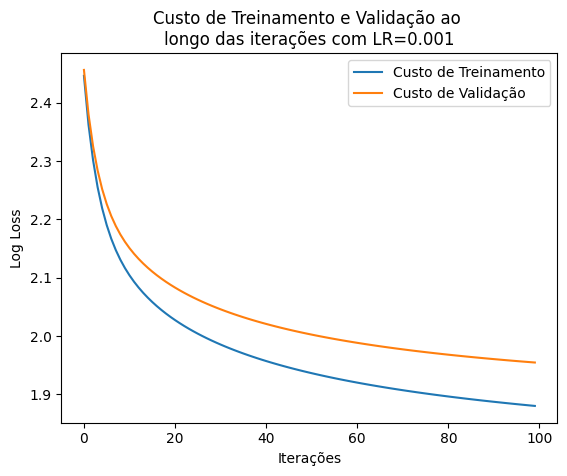

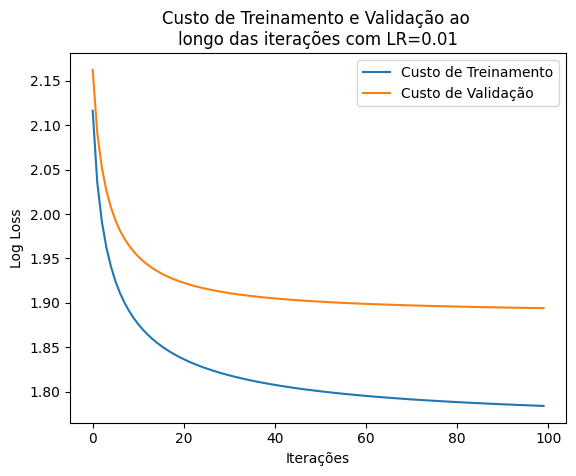

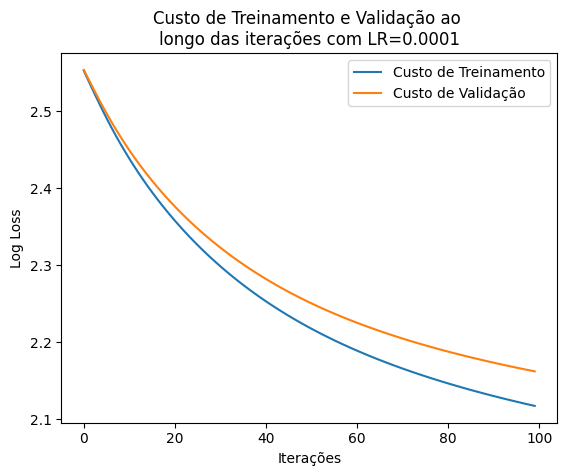

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, log_loss, accuracy_score


learning_rates = [0.001, 0.01, 0.0001]
for lr in learning_rates:
    # Create the SGDClassifier with logistic regression loss for multiclass classification
    model_RegLog = SGDClassifier(loss='log_loss', max_iter=1, random_state=42, learning_rate='constant', eta0=lr)
    # Variables to store training and validation loss
    n_iters = 100
    training_loss = []
    validation_loss = []

    for iter in range(n_iters):
        # Realiza apenas 1 iteração de treino
        model_RegLog.partial_fit(X_train, y_train, classes=y_train.unique())

        # Cômputo de probabilidades de treinamento e validação
        y_train_prob = model_RegLog.predict_proba(X_train)
        y_val_prob = model_RegLog.predict_proba(X_val)

        # Calcula log loss a partir de propabilidades computadas anteriormente
        train_loss = log_loss(y_train, y_train_prob)
        val_loss = log_loss(y_val, y_val_prob)

        # Guarda loss para plotar depois
        training_loss.append(train_loss)
        validation_loss.append(val_loss)

    # Plot the training and validation loss
    plt.plot(range(n_iters), training_loss, label='Custo de Treinamento')
    plt.plot(range(n_iters), validation_loss, label='Custo de Validação')
    plt.xlabel('Iterações')
    plt.ylabel('Log Loss')
    plt.title(f'Custo de Treinamento e Validação ao \nlongo das iterações com LR={lr}')
    plt.legend()
    plt.show()



> **Quais foram suas conclusões? (1-2 parágrafos)**




Podemos ver que o modelo com learning rate = 0.001 foi o que obteve o melhor resultado, pois não está nem underfitting nem overfitting como os outros 2

3. (0,75 ponto) Faça um gráfico da função de custo vs. número de épocas, em relação ao conjunto de treinamento e ao conjunto de validação. Também faça um gráfico, de mesma estrutura, descrevendo a acurácia vs. número de época.

    Como é o comportamento do modelo? O modelo está aprendendo?

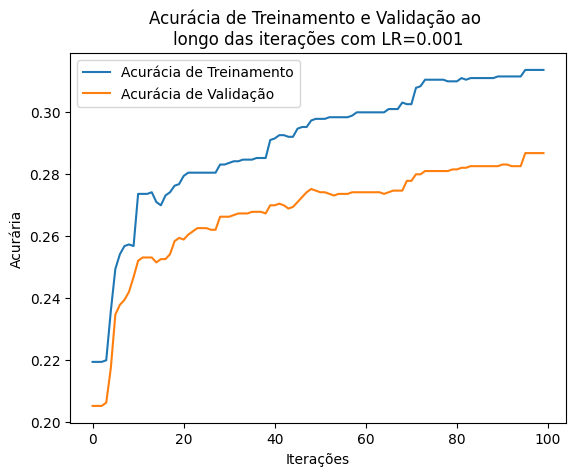

In [ ]:
from sklearn.metrics import accuracy_score
# Create the SGDClassifier with logistic regression loss for multiclass classification
model_RegLog = SGDClassifier(loss='log_loss', max_iter=1, random_state=42, learning_rate='constant', eta0=0.001)
# Variables to store training and validation loss
n_iters = 100
training_loss = []
validation_loss = []
train_accs = []
val_accs = []
for iter in range(n_iters):
    # Realiza apenas 1 iteração de treino
    model_RegLog.partial_fit(X_train, y_train, classes=y_train.unique())

    # Cômputo de probabilidades de treinamento e validação
    y_train_pred = model_RegLog.predict(X_train)
    y_val_pred = model_RegLog.predict(X_val)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation loss
plt.plot(range(n_iters), train_accs, label='Acurácia de Treinamento')
plt.plot(range(n_iters), val_accs, label='Acurácia de Validação')
plt.xlabel('Iterações')
plt.ylabel('Acurária')
plt.title(f'Acurácia de Treinamento e Validação ao \nlongo das iterações com LR=0.001')
plt.legend()
plt.show()

> **Quais foram suas conclusões? (1-2 parágrafos)**




O modelo parece aprender ao longo das épocas e estabilizar em uma acurácia de validação próxima dos 0.29, além de que a acurácia do treino está consideravelmente maior que a da validação

4. (0,9 pontos) Faça pelo menos 2 gráficos que visualizem as fronteiras de decisão entre duas *features*. Por exemplo, você pode fazer um gráfico da fronteira de decisão entre os atributos `tempo_exp_dados` e `satisfacao_empresa`, caso tenha utilizado essas *features*. Verifique se está fazendo o plot para atributos relevantes utilizados em seu modelo.

    > **Observação:** [Este tutorial](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py) do scikit-learn demonstra como extrair essas informações do `sklearn.linear_model.SGDClassifier`.

<ipython-input-223-0fda0e444f44>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors=plt.cm.get_cmap('tab20', 13)  # A colormap with at least 13 colors


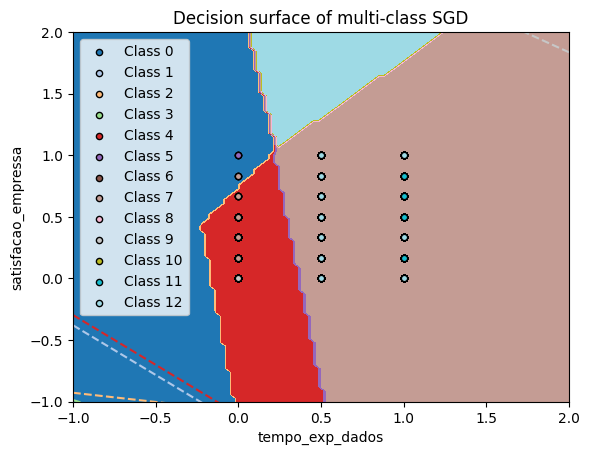

In [ ]:
# visualização das fronteiras de decisão.
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier


# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X_2d_train = X_train[["nivel_profissional", "tempo_exp_ti"]]
X_2d_val = X_val[["nivel_profissional", "tempo_exp_ti"]]

model_2d = SGDClassifier(loss='log_loss', random_state=42)
model_2d.fit(X_2d_train, y_train)

colors=plt.cm.get_cmap('tab20', 13)  # A colormap with at least 13 colors


ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    model_2d,
    X_2d_val,
    cmap=colors,
    ax=ax,
    response_method="predict",
    xlabel="tempo_exp_dados",
    ylabel="satisfacao_empressa",
)
plt.axis("tight")
# plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
# Plot also the training points

# Plot the training points
for i in range(13):  # Adjust the loop to iterate through 13 classes
    idx = np.where(y_val == i)
    plt.scatter(
        X_2d_val.iloc[idx]["nivel_profissional"],
        X_2d_val.iloc[idx]["tempo_exp_ti"],
        c=[colors(i)],
        label=f'Class {i}',
        edgecolor="black",
        s=20
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model_RegLog.coef_
intercept = model_RegLog.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

# Plot hyperplanes for each class
for i in range(13):
    plot_hyperplane(i, colors(i))

plt.legend()
plt.show()

<ipython-input-224-3103e7cb240d>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors=plt.cm.get_cmap('tab20', 13)  # A colormap with at least 13 colors


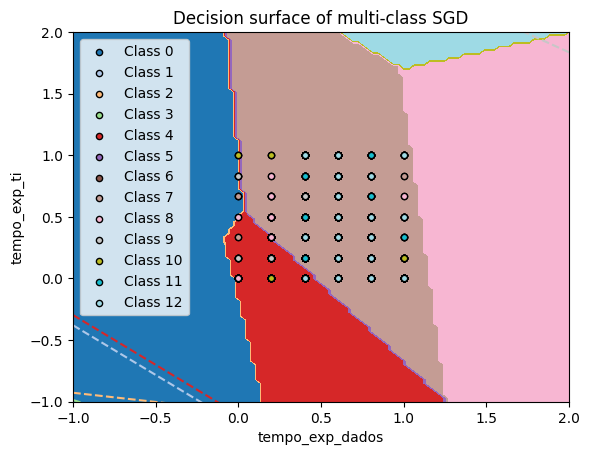

In [ ]:
# visualização das fronteiras de decisão.
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier


# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X_2d_train = X_train[["nivel_ensino", "tempo_exp_ti"]]
X_2d_val = X_val[["nivel_ensino", "tempo_exp_ti"]]

model_2d = SGDClassifier(loss='log_loss', random_state=42)
model_2d.fit(X_2d_train, y_train)

colors=plt.cm.get_cmap('tab20', 13)  # A colormap with at least 13 colors


ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    model_2d,
    X_2d_val,
    cmap=colors,
    ax=ax,
    response_method="predict",
    xlabel="tempo_exp_dados",
    ylabel="tempo_exp_ti",
)
plt.axis("tight")
# plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
# Plot also the training points

# Plot the training points
for i in range(13):  # Adjust the loop to iterate through 13 classes
    idx = np.where(y_val == i)
    plt.scatter(
        X_2d_val.iloc[idx]["nivel_ensino"],
        X_2d_val.iloc[idx]["tempo_exp_ti"],
        c=[colors(i)],
        label=f'Class {i}',
        edgecolor="black",
        s=20
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model_RegLog.coef_
intercept = model_RegLog.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

# Plot hyperplanes for each class
for i in range(13):
    plot_hyperplane(i, colors(i))

plt.legend()
plt.show()


> **Quais foram suas conclusões? (1-2 parágrafos)**




Acreditamos que a visualização das fronteiras de decisão não nos ofereceu muito insight sobre a qualidade do modelo por causa do grande número de classes.

5. (0,75 pontos) Avalie os resultados do seu modelo, utilizando métricas de classificação que achar relevante. Plote a matriz de confusão e analise os resultados.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_val_pred = model_RegLog.predict(X_val)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        96
           3       0.34      0.12      0.18       113
           4       0.00      0.00      0.00       156
           5       0.31      0.58      0.41       302
           6       0.00      0.00      0.00       266
           7       0.30      0.72      0.42       390
           8       0.20      0.29      0.24       242
           9       0.00      0.00      0.00       132
          10       0.25      0.07      0.11        69
          11       0.00      0.00      0.00        52
          12       0.00      0.00      0.00        42
          13       0.00      0.00      0.00        31

    accuracy                           0.29      1901
   macro avg       0.11      0.14      0.10      1901
weighted avg       0.17      0.29      0.20      1901



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


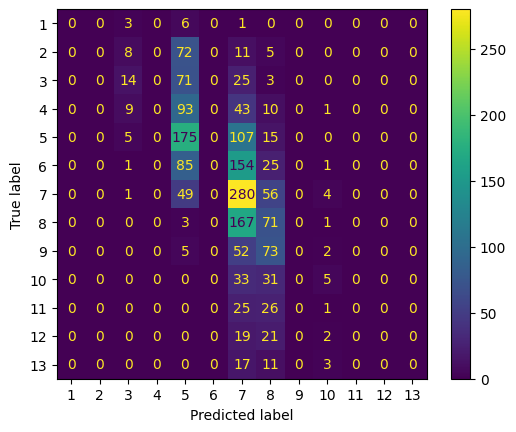

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [i+1 for i in range(13)])

cm_display.plot()
plt.show()

> **Quais foram suas conclusões? (1-2 parágrafos)**


Pela matriz de confusão e pela tabela acima, podemos ver que o desempenho do nosso modelo varia bastante de acordo com a classe de interesse. Os melhores resultados foram obtidos nas classes 5,7 e 8. Para as demais classes o modelo não foi muito melhor do que uma classificacão aleatória no conjunto de validação.*Escreva as conclusões aqui.*

## Submissão dos resultados no Kaggle

Para avaliar o desempenho do seu modelo, você deve submeter suas predições, no conjunto de teste, na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) do Kaggle.

A plataforma calculará automaticamente a métrica de avaliação e fornecerá um score.

> **Observação:** Não se preocupe apenas com o resultado do seu modelo. O seu score no placar não irá influenciar a sua nota nesta atividade :).

### Atividades

1. (1,0 pontos) Escolha **seus melhores modelos** para as duas tarefas feitas (regressão e classificação) e faça a predição dos atributos `salario` e `faixa_salarial` com base nos dados da pesquisa contidos no **conjunto de teste**.

  **Gere um arquivo de submissão, de tipo CSV, no formato adequado:** Gere uma linha por pessoa no conjunto de teste, com as duas colunas para os valores preditos, que devem estar nomeadas como **`salario`** e **`faixa_salarial`**.

  > Exemplo de arquivo (com o cabeçalho e conteúdo formatados):
  > ```
  > id, salario, faixa_salarial
  > 1, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 2, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 3, 0.0, "de R$ 0/mês a R$ 0/mês"
  > ```

  Submeta suas predições na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) no Kaggle.

  Conte para a gente! Qual foi o resultado que você obteve na competição? :)

## Submissão Regressão Logística

In [ ]:
df_teste = pd.read_csv('test_data.csv')
prep_teste = PreparaDadosSimplificada(df_teste, teste=True)
df_teste_preparado = prep_teste.prepara_dados()
X_test = df_teste_preparado
# Normalizando
colunas_normalizar = list(X_train.select_dtypes(exclude=['bool']).columns)
min = X_train[colunas_normalizar].min()
max = X_train[colunas_normalizar].max()
X_test[colunas_normalizar] = (X_train[colunas_normalizar] - min) / (max - min)

<ipython-input-205-55f56ea874f2>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_processado['tempo_exp_ti'] = self.df_processado['tempo_exp_ti'].map(self.tempo_exp_ti_map)
<ipython-input-205-55f56ea874f2>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_processado['nivel_ensino'] = self.df_processado['nivel_ensino'].map(self.nivel_ensino_map)
<ipython-input-205-55f56ea874f2>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
faixas = list(df_treino['faixa_salarial'].unique())
faixas

['de R$ 25.001/mês a R$ 30.000/mês',
 'de R$ 20.001/mês a R$ 25.000/mês',
 'de R$ 6.001/mês a R$ 8.000/mês',
 'de R$ 3.001/mês a R$ 4.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 2.001/mês a R$ 3.000/mês',
 'de R$ 16.001/mês a R$ 20.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 1.001/mês a R$ 2.000/mês',
 'Acima de R$ 40.001/mês',
 'de R$ 30.001/mês a R$ 40.000/mês',
 'Menos de R$ 1.000/mês',
 'de R$ 101/mês a R$ 2.000/mês']

In [ ]:
y_test_pred = model_RegLog.predict(X_test)



ids = df_teste['id']

y_final = []
for i in range(len(y_test_pred)):
    y_final.append(faixas[y_test_pred[i]])
y_final = np.array(y_final)
submission_df = pd.DataFrame({'salario': y_final}, index=ids)
submission_df.index.name = 'id'
submission_df.to_csv('submission-RegLog.csv', header=True)

## Submissão Regressão Linear

OBS: tivemos problemas nas primeiras submissões por conta de normalização, conside

In [ ]:
df_teste = pd.read_csv('test_data.csv')
prep_teste = PreparaDadosSimplificada(df_teste, teste=True)
df_teste_preparado = prep_teste.prepara_dados()
X_test = df_teste_preparado
# Normalizando
colunas_normalizar = X_train.select_dtypes(exclude=['bool']).columns
X_test[colunas_normalizar] = (X_train[colunas_normalizar] - min) / (max - min)

<ipython-input-205-55f56ea874f2>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_processado['tempo_exp_ti'] = self.df_processado['tempo_exp_ti'].map(self.tempo_exp_ti_map)
<ipython-input-205-55f56ea874f2>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_processado['nivel_ensino'] = self.df_processado['nivel_ensino'].map(self.nivel_ensino_map)
<ipython-input-205-55f56ea874f2>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Obtendo as predições:

In [ ]:
y_test_pred_gd = model_gd.predict(X_test)
y_test_pred_normal = model_normal.predict(X_test)
ids = df_teste['id']

In [ ]:
submission_df = pd.DataFrame({'salario': y_test_pred_gd}, index=ids)
submission_df.index.name = 'id'
submission_df.to_csv('submission-gd-3.csv', header=True)

In [ ]:
negative_count = (y_test_pred_normal < 0).sum()
negative_percentage = (negative_count / y_test_pred_normal.size) * 100
negative_percentage

0.4206098843322818

In [ ]:
submission_df = pd.DataFrame({'salario': y_test_pred_normal}, index=ids)
submission_df.index.name = 'id'
submission_df.to_csv('submission-normal-3.csv', header=True)

*Conte aqui :)*

## Prazo

09 de outubro, quarta-feira, 23:59.

Política de penalidade para submissões atrasadas: Você não está sendo encorajada(o) a submeter o trabalho depois da data de submissão. Entretanto, caso isso aconteça, a nota será penalizada da seguinte forma:
- 10 de outubro, 23:59: nota * 0,75
- 11 de outubro, 23:59: nota * 0,5
- 12 de outubro, 23:59: nota * 0,25


## Envio

No Google Classroom, envie seu Jupyter Notebook, no formato RA1_RA2_2024s2_mc886mo444_tarefa_02.ipynb.

**Esta atividade NÃO é individual, deve ser realizada em dupla (grupo de duas pessoas).**
